In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits import mplot3d

from skimage import io
from matplotlib import image as mpimg
from PIL import Image

import scipy.integrate as integrate
import scipy.special as special
from statistics import mean
import scipy.stats as stats
from scipy import signal
import pandas as pd

In [3]:
ADCP_0n78e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0n78e_rm5.cdf'
ADCP_2 = xr.open_dataset(ADCP_0n78e_F) # O N, 78 E
ADCP_2 

<xarray.Dataset>
Dimensions:  (time: 4021, depth: 81, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2008-08-09T12:00:00 ... 2019-08-12T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 385.0 390.0 395.0 400.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 78.0
Data variables:
    u_1205   (time, depth, lat, lon) float32 ...
    v_1206   (time, depth, lat, lon) float32 ...
Attributes:
    CREATION_DATE:  13:58 13-JUN-2022

In [4]:
## These are Filled!
ADCP_0n80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0n80.5e_rm5.cdf'
ADCP_1 = xr.open_dataset(ADCP_0n80_5e_F) # O N, 80.5 E

ADCP_0n83e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0n83e_rm5.cdf'
ADCP_4 = xr.open_dataset(ADCP_0n83e_F) # O N, 83 E

ADCP_0_75n80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0.75n80.5e_rm5.cdf'
ADCP_3 = xr.open_dataset(ADCP_0_75n80_5e_F) # O.75 N, 80.5 E

ADCP_0_75s80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_0.75s80.5e_rm5.cdf'
ADCP_5 = xr.open_dataset(ADCP_0_75s80_5e_F) # O.75 S, 80.5 E

ADCP_1_5n80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_1.5n80.5e_rm5.cdf'
ADCP_8 = xr.open_dataset(ADCP_1_5n80_5e_F) # 1.5 N, 80.5 E

ADCP_1_5s80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_1.5s80.5e_rm5.cdf'
ADCP_6 = xr.open_dataset(ADCP_1_5s80_5e_F) # 1.5 S, 80.5 E

ADCP_2_5n_80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_2.5n80.5e_rm5.cdf'
ADCP_9 = xr.open_dataset(ADCP_2_5n_80_5e_F) # 2.5 N, 80.5 E

ADCP_2_5s_80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_2.5s80.5e_rm5.cdf'
ADCP_7 = xr.open_dataset(ADCP_2_5s_80_5e_F) # 2.5 S, 80.5 E

ADCP_4s_80_5e_F = '~/NOAA Work/ADCP Data - Filled/adcp_4s80.5e_rm5.cdf'
ADCP_10 = xr.open_dataset(ADCP_4s_80_5e_F) # 4 S, 80.5 E

ADCP_1

<xarray.Dataset>
Dimensions:  (time: 5404, depth: 84, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2004-10-27T12:00:00 ... 2019-08-13T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 400.0 405.0 410.0 415.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 80.5
Data variables:
    u_1205   (time, depth, lat, lon) float32 ...
    v_1206   (time, depth, lat, lon) float32 ...
Attributes:
    CREATION_DATE:  13:59 13-JUN-2022

In [5]:
## These are Unfilled!
ADCP_0_75n80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0.75n80.5e_dy.cdf'
ADCP_3_U = xr.open_dataset(ADCP_0_75n80_5e_U) # O.75 N, 80.5 E

ADCP_0_75s80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0.75s80.5e_dy.cdf'
ADCP_5_U = xr.open_dataset(ADCP_0_75s80_5e_U) # O.75 S, 80.5 E

ADCP_0n80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0n80.5e_dy.cdf'
ADCP_1_U = xr.open_dataset(ADCP_0n80_5e_U) # O N, 80.5 E

ADCP_0n83e_F = '~/NOAA Work/ADCP Data - Unfilled/adcp0n83e_dy.cdf'
ADCP_4_U = xr.open_dataset(ADCP_0n83e_F) # O N, 83 E

ADCP_1_5n80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp1.5n80.5e_dy.cdf'
ADCP_8_U = xr.open_dataset(ADCP_1_5n80_5e_U) # 1.5 N, 80.5 E

ADCP_1_5s80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp1.5s80.5e_dy.cdf'
ADCP_6_U = xr.open_dataset(ADCP_1_5s80_5e_U) # 1.5 S, 80.5 E

ADCP_2_5n_80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp2.5n80.5e_dy.cdf'
ADCP_9_U = xr.open_dataset(ADCP_2_5n_80_5e_U) # 2.5 N, 80.5 E

ADCP_2_5s_80_5e_F = '~/NOAA Work/ADCP Data - Unfilled/adcp2.5s80.5e_dy.cdf'
ADCP_7_U = xr.open_dataset(ADCP_2_5s_80_5e_F) # 2.5 S, 80.5 E

ADCP_4s_80_5e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp4s80.5e_dy.cdf'
ADCP_10_U = xr.open_dataset(ADCP_4s_80_5e_U) # 4 S, 80.5 E

ADCP_0n78e_U = '~/NOAA Work/ADCP Data - Unfilled/adcp0n78e_dy.cdf'
ADCP_2_U = xr.open_dataset(ADCP_0n78e_U) # 0 N, 78 E

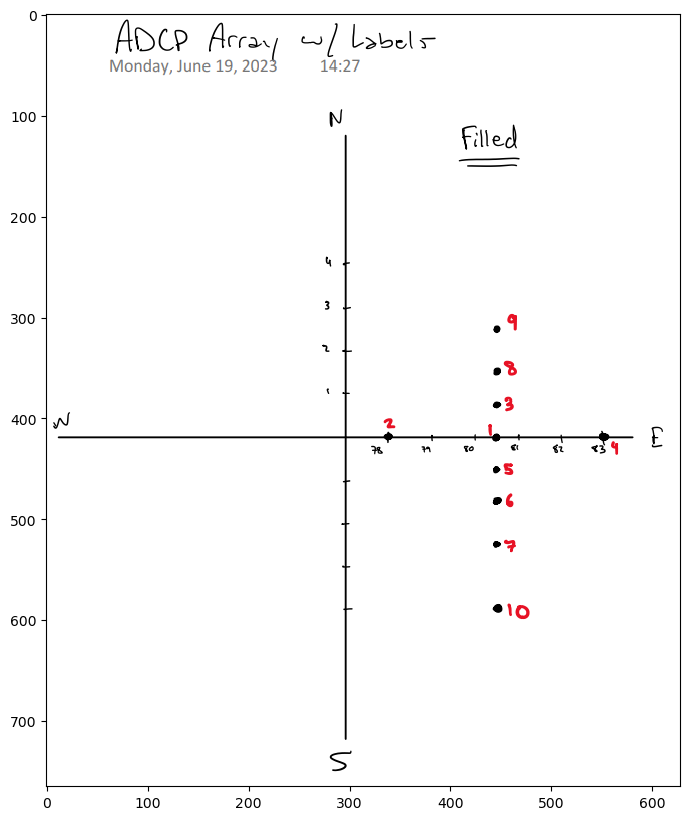

In [6]:
# ADCP Config with labels:
plt.figure(figsize = (7,10))
img = io.imread('~/NOAA Work/Images/ADCP_Config.PNG')
io.imshow(img)


Text(0.5, 0, 'Date')

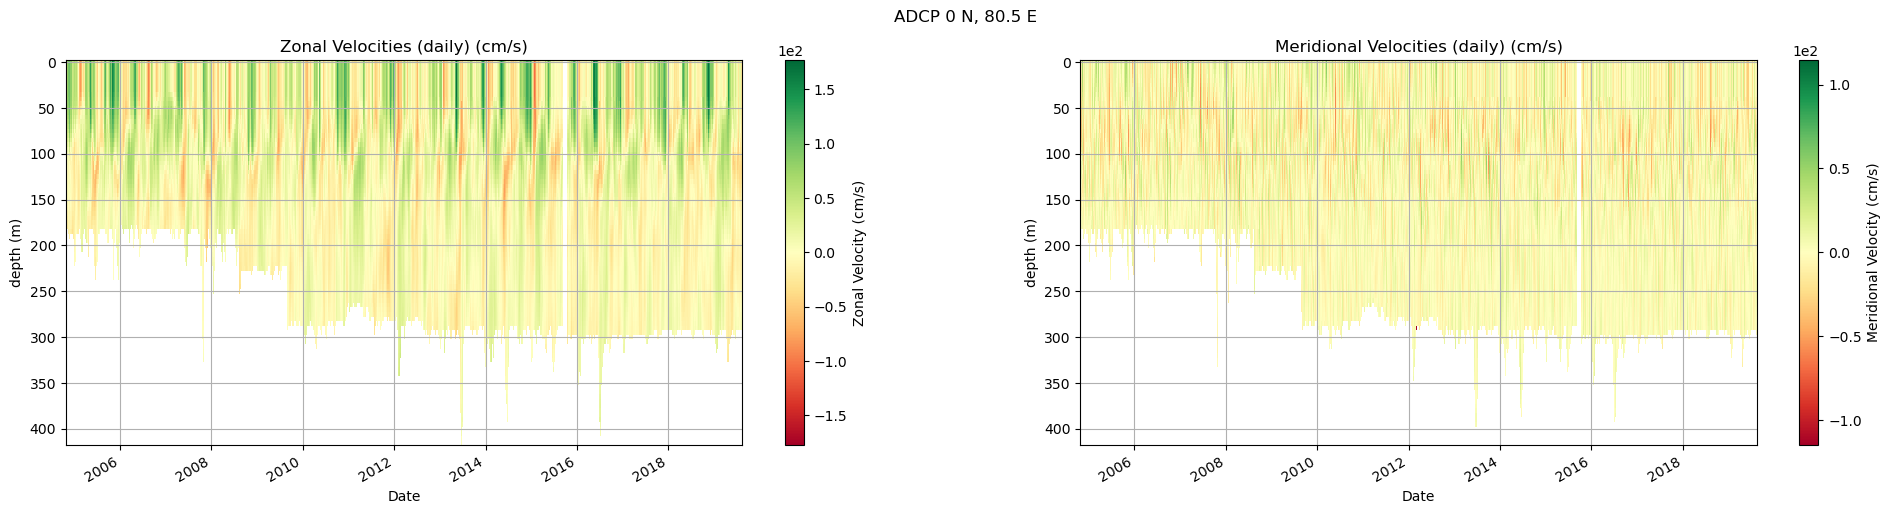

In [7]:
u_1 = ADCP_1.isel(lat = 0, lon = 0)['u_1205']
v_1 = ADCP_1.isel(lat = 0, lon = 0)['v_1206']
# for i in range(len(u_1)):
#     if u_1[i] == 1e35:
#         u_1[i] = 0
u_1 = xr.where(u_1 == 1e35, np.NaN, u_1)
v_1 = xr.where(v_1 == 1e35, np.NaN, v_1)

plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_1.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_1.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
# u_1.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
# plt.gca().invert_yaxis()
# v_1.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0 N, 80.5 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

In [8]:
u_2 = ADCP_2.isel(lat = 0, lon = 0)['u_1205']
v_2 = ADCP_2.isel(lat = 0, lon = 0)['v_1206']
u_2 = xr.where(u_2 == 1e35, np.NaN, u_2)
v_2 = xr.where(v_2 == 1e35, np.NaN, v_2)
u_2 = u_2[:, 0:41]

u_3 = ADCP_3.isel(lat = 0, lon = 0)['u_1205']
v_3 = ADCP_3.isel(lat = 0, lon = 0)['v_1206']
u_3 = xr.where(u_3 == 1e35, np.NaN, u_3)
v_3 = xr.where(v_3 == 1e35, np.NaN, v_3)

u_4 = ADCP_4.isel(lat = 0, lon = 0)['u_1205']
v_4 = ADCP_4.isel(lat = 0, lon = 0)['v_1206']
u_4 = xr.where(u_4 == 1e35, np.NaN, u_4)
v_4 = xr.where(v_4 == 1e35, np.NaN, v_4)

u_5 = ADCP_5.isel(lat = 0, lon = 0)['u_1205']
v_5 = ADCP_5.isel(lat = 0, lon = 0)['v_1206']
u_5 = xr.where(u_5 == 1e35, np.NaN, u_5)
v_5 = xr.where(v_5 == 1e35, np.NaN, v_5)

u_6 = ADCP_6.isel(lat = 0, lon = 0)['u_1205']
v_6 = ADCP_6.isel(lat = 0, lon = 0)['v_1206']
u_6 = xr.where(u_6 == 1e35, np.NaN, u_6)
v_6 = xr.where(v_6 == 1e35, np.NaN, v_6)

u_7 = ADCP_7.isel(lat = 0, lon = 0)['u_1205']
v_7 = ADCP_7.isel(lat = 0, lon = 0)['v_1206']
u_7 = xr.where(u_7 == 1e35, np.NaN, u_7)
v_7 = xr.where(v_7 == 1e35, np.NaN, v_7)

u_8 = ADCP_8.isel(lat = 0, lon = 0)['u_1205']
v_8 = ADCP_8.isel(lat = 0, lon = 0)['v_1206']
u_8 = xr.where(u_8 == 1e35, np.NaN, u_8)
v_8 = xr.where(v_8 == 1e35, np.NaN, v_8)

u_9 = ADCP_9.isel(lat = 0, lon = 0)['u_1205']
v_9 = ADCP_9.isel(lat = 0, lon = 0)['v_1206']
u_9 = xr.where(u_9 == 1e35, np.NaN, u_9)
v_9 = xr.where(v_9 == 1e35, np.NaN, v_9)

Text(0.5, 0, 'Date')

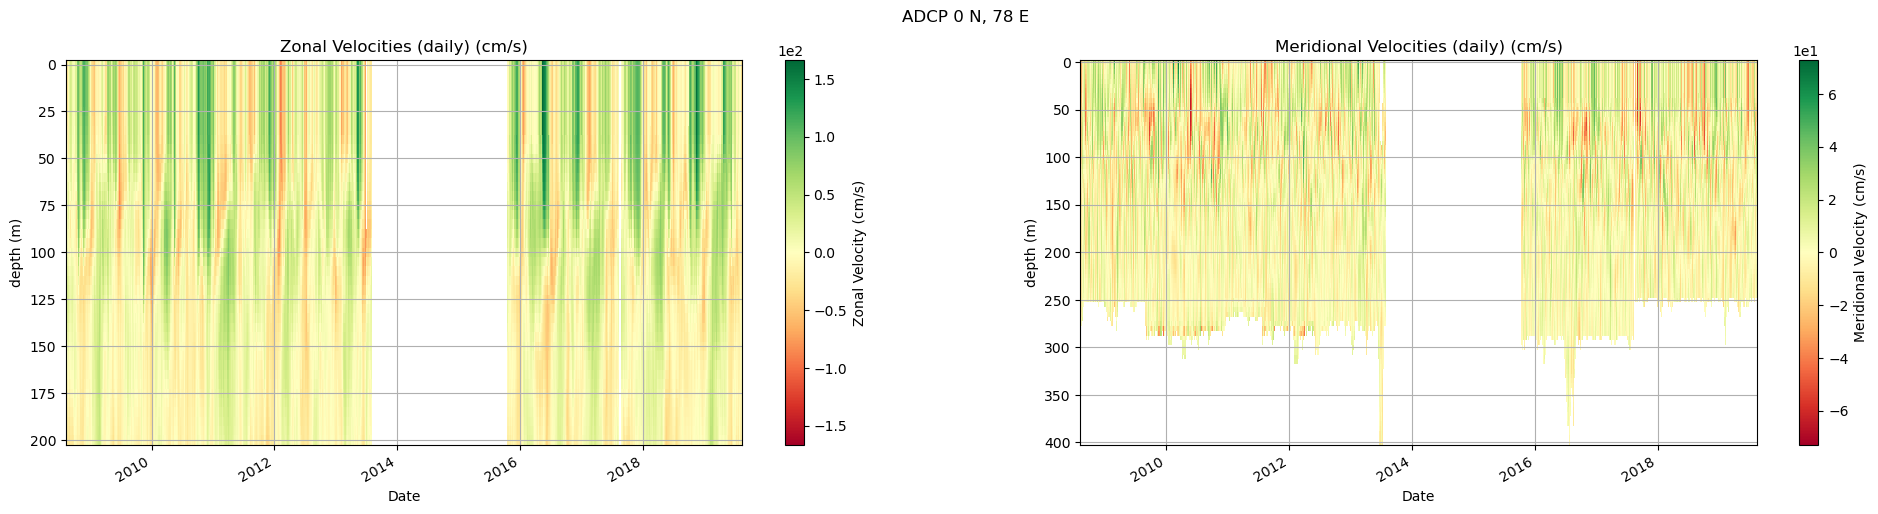

In [9]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_2.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_2.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0 N, 78 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

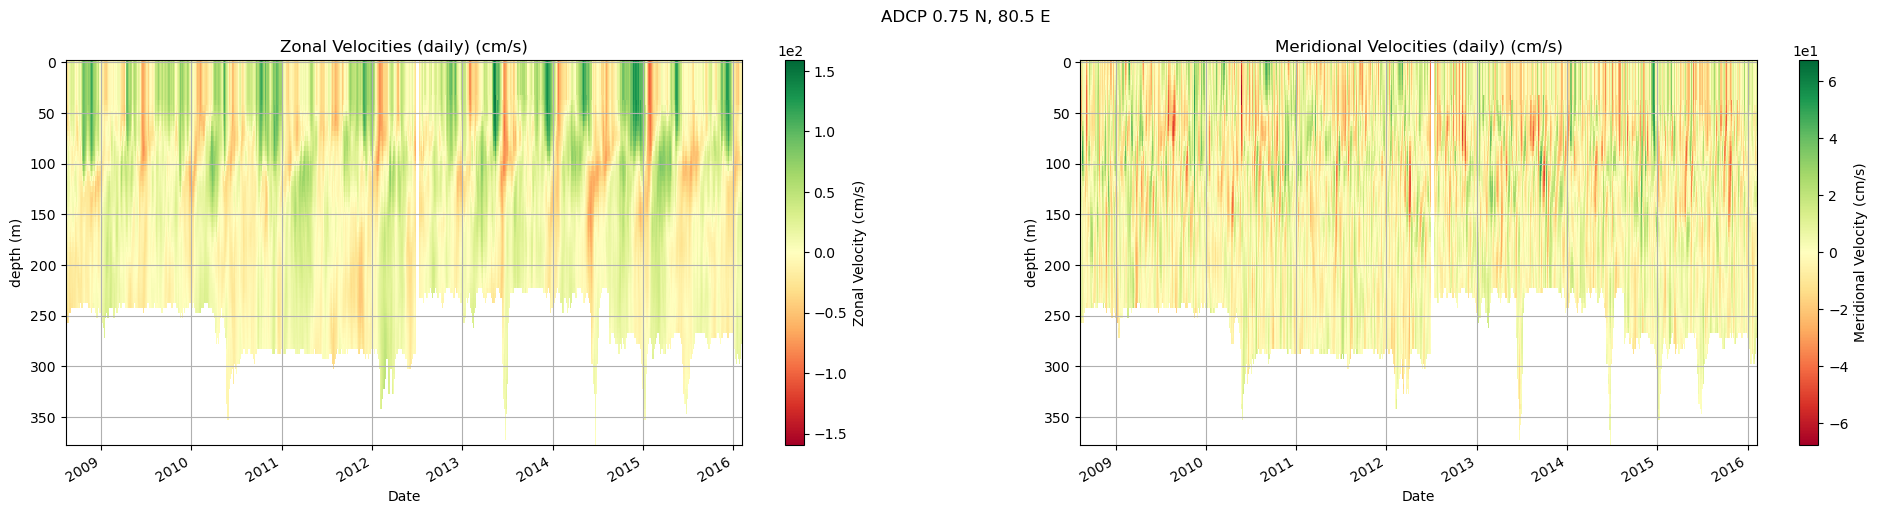

In [10]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_3.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_3.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0.75 N, 80.5 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

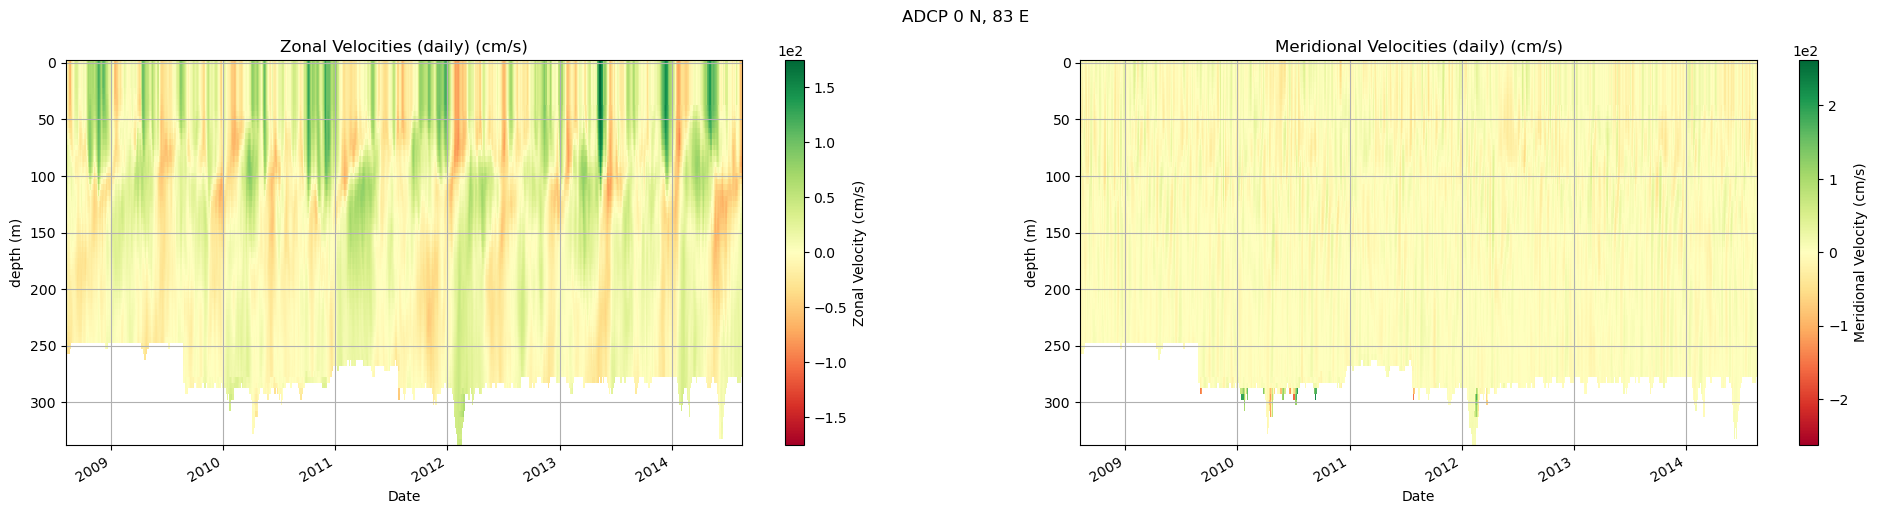

In [11]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_4.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_4.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0 N, 83 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

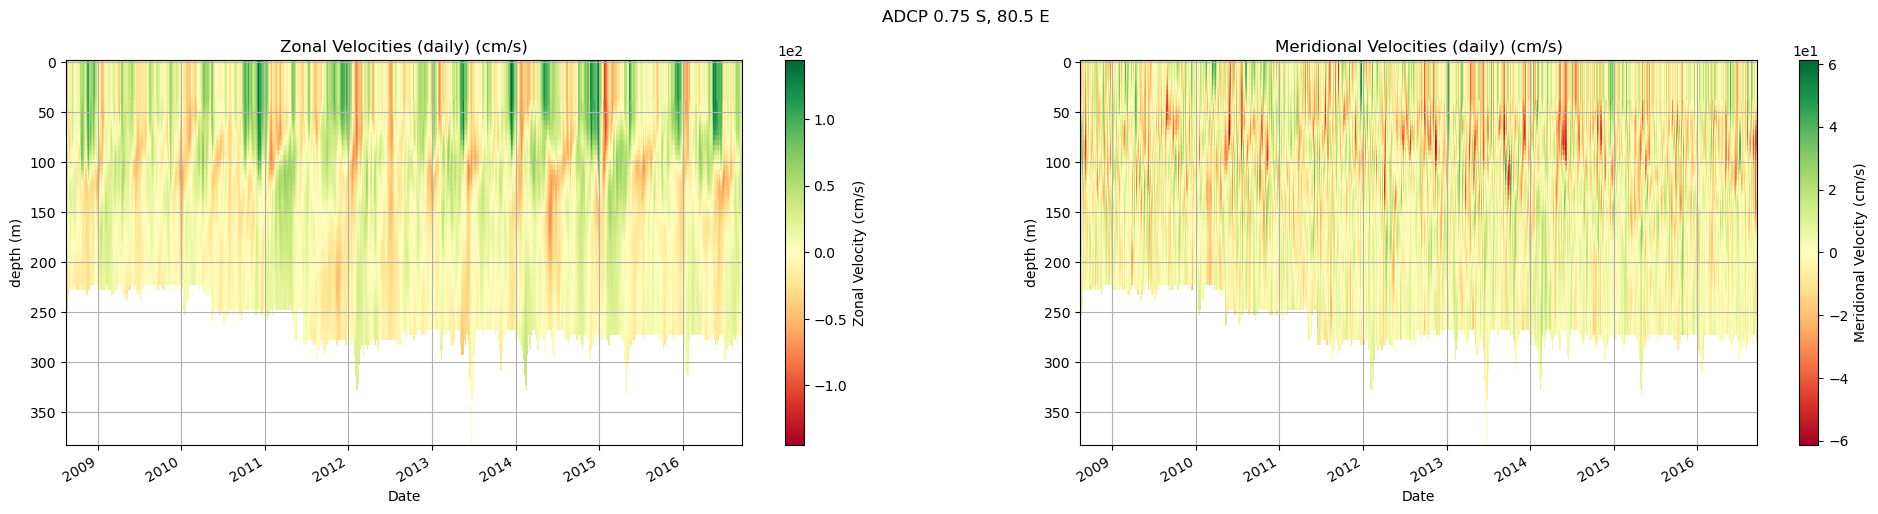

In [12]:
plt.figure(figsize = (24,5))
plt.subplot(1, 2, 1)
u_5.plot(x = 'time', y = 'depth', label = 'Zonal Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Zonal Velocities (daily) (cm/s)')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
plt.subplot(1, 2, 2)
v_5.plot(x = 'time', y = 'depth', label = 'Meridional Velocity (cm/s)', cmap = 'RdYlGn')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.grid()
plt.title('Meridional Velocities (daily) (cm/s)')
plt.suptitle('ADCP 0.75 S, 80.5 E')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (cm/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

In [13]:
u_1 = u_1[:, 0:41]
v_1 = v_1[:, 0:41]

u_2 = u_2[:, 0:41]
v_2 = v_2[:, 0:41]

u_3 = u_3[:, 0:41]
v_3 = v_3[:, 0:41]

u_4 = u_4[:, 0:41]
v_4 = v_4[:, 0:41]

u_5 = u_5[:, 0:41]
v_5 = v_5[:, 0:41]

u_6 = u_6[:, 0:41]
v_6 = v_6[:, 0:41]

u_7 = u_7[:, 0:41]
v_7 = v_7[:, 0:41]

u_8 = u_8[:, 0:41]
v_8 = v_8[:, 0:41]

u_9 = u_9[:, 0:41]
v_9 = v_9[:, 0:41]

In [14]:
u_4[6, 1]

<xarray.DataArray 'u_1205' ()>
array(-16.609129, dtype=float32)
Coordinates:
    time     datetime64[ns] 2008-08-14T12:00:00
    depth    float32 5.0
    lat      float32 0.0
    lon      float32 83.0

In [15]:
# In case take mean before calcs: 
# u_1 = u_1.rolling(time =1, center=True).mean()
# plt.figure(figsize = (10,4))
# u_1.plot(x = 'time', y = 'depth')
# plt.gca().invert_yaxis()
# plt.ylabel('depth (m)')
# plt.grid()
# plt.title('Daily averaged Zonal Velocity (cm/s)')


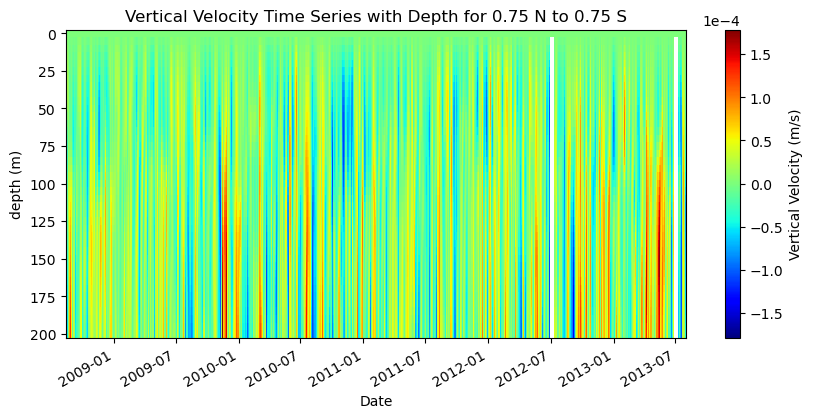

In [16]:
du = (u_4 - u_2) / 55600000    # Do I want daily averaged values before I integrate (with u and v) or after (with w values)
dv_75 = (v_3 - v_5) / 16700000 
func = du + dv_75
z = func['depth']
t = func['time']

from scipy.integrate import trapz
w_1 = integrate.cumtrapz(func, z, initial=0)
plt.figure(figsize = (10,4))
w_1 = xr.DataArray(w_1, coords=func.coords, dims=func.dims, attrs=func.attrs, )
w_1.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.xlim(w_1['time'][0], w_1['time'][1812])
plt.title('Vertical Velocity Time Series with Depth for 0.75 N to 0.75 S')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Vertical Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')
w_1.to_netcdf('~/NOAA Work/w_1.nc')

In [17]:
w_1

<xarray.DataArray (time: 2196, depth: 41)>
array([[ 0.00000000e+00, -4.76555109e-07, -1.14260616e-06, ...,
        -1.17671363e-04, -1.19918333e-04, -1.21938000e-04],
       [ 0.00000000e+00, -5.51777029e-07, -1.33668717e-06, ...,
        -1.23770008e-04, -1.26183947e-04, -1.28152470e-04],
       [ 0.00000000e+00,  1.15897699e-06,  2.05078012e-06, ...,
        -1.22182427e-04, -1.24593334e-04, -1.26481777e-04],
       ...,
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * time     (time) datetime64[ns] 2008-08-14T12:00:00 ... 2014-08-18T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
    lat      float32 0.0
    lon      float32 80.5

Text(0.5, 0, 'Date')

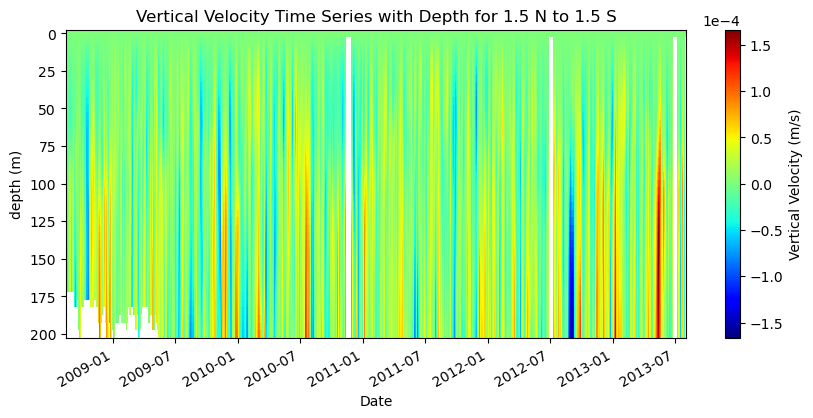

In [18]:
dv_15 = (v_8 - v_6) / 33300000 
func = du + dv_15
z = func['depth']
t = func['time']

w_2 = integrate.cumtrapz(func, z, initial=0)
plt.figure(figsize = (10,4))
w_2 = xr.DataArray(w_2, coords=func.coords, dims=func.dims, attrs=func.attrs)
w_2.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.xlim(w_2['time'][0], w_2['time'][1812])
plt.title('Vertical Velocity Time Series with Depth for 1.5 N to 1.5 S')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Vertical Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

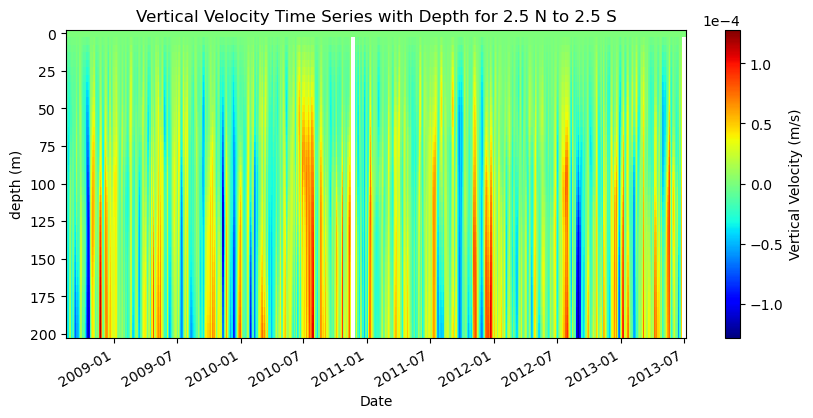

In [19]:
dv_25 = (v_9 - v_7) / 55600000 
func = du + dv_25
z = func['depth']
t = func['time']

w_3 = integrate.cumtrapz(func, z, initial=0)
plt.figure(figsize = (10,4))
w_3 = xr.DataArray(w_3, coords=func.coords, dims=func.dims, attrs=func.attrs)
w_3.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
# plt.xlim(w_3['time'][0], w_3['time'][1812])
plt.title('Vertical Velocity Time Series with Depth for 2.5 N to 2.5 S')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Vertical Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

In [20]:
w_2

<xarray.DataArray (time: 2194, depth: 41)>
array([[ 0.00000000e+00, -2.14461379e-06, -4.60734512e-06, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00, -2.94386380e-06, -6.12787511e-06, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00, -3.31398730e-06, -6.76875826e-06, ...,
                    nan,             nan,             nan],
       ...,
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * time     (time) datetime64[ns] 2008-08-16T12:00:00 ... 2014-08-18T12:00:00
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
    lat      float32 0.0
    lon      float32 80.5

In [21]:
w_1_150 = w_1.sel(depth = 150)
w_1_150 = w_1_150[0:1786]
w_1_150

<xarray.DataArray (time: 1786)>
array([-9.73844765e-05, -9.90928636e-05, -9.32384535e-05, ...,
                   nan,             nan,             nan])
Coordinates:
  * time     (time) datetime64[ns] 2008-08-14T12:00:00 ... 2013-07-04T12:00:00
    depth    float32 150.0
    lat      float32 0.0
    lon      float32 80.5

In [22]:
w_2_150 = w_2.sel(depth = 150)
w_2_150 = w_2_150[0:1786]
w_2_150

<xarray.DataArray (time: 1786)>
array([-7.14324065e-05, -7.95249244e-05, -7.39776286e-05, ...,
                   nan,             nan,             nan])
Coordinates:
  * time     (time) datetime64[ns] 2008-08-16T12:00:00 ... 2013-07-06T12:00:00
    depth    float32 150.0
    lat      float32 0.0
    lon      float32 80.5

In [23]:
w_3_150 = w_3.sel(depth = 150)
w_3_150 

<xarray.DataArray (time: 1786)>
array([-6.01304734e-05, -5.92263658e-05, -5.33860064e-05, ...,
                   nan,             nan,             nan])
Coordinates:
  * time     (time) datetime64[ns] 2008-08-16T12:00:00 ... 2013-07-06T12:00:00
    depth    float32 150.0
    lat      float32 0.0
    lon      float32 80.5

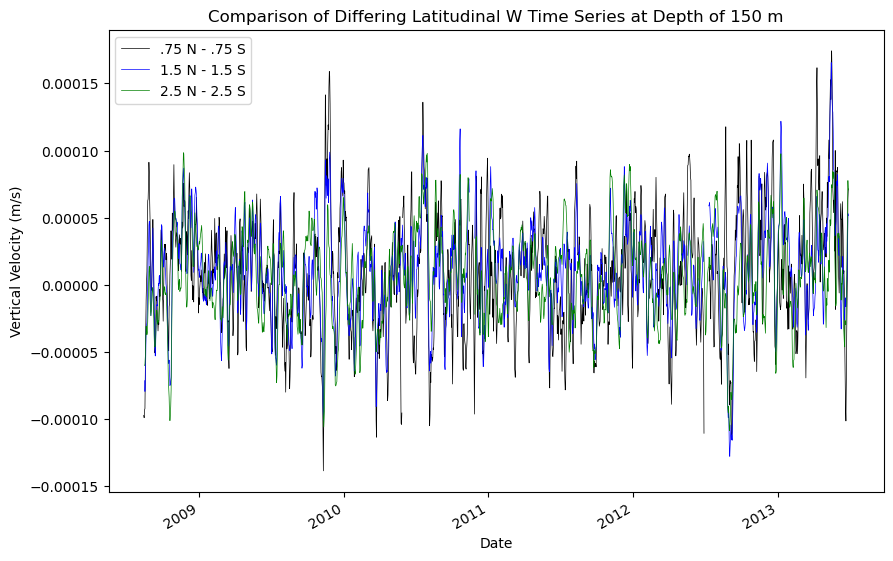

In [24]:
plt.subplots(figsize = (10,6))
w_1_150.plot(label = '.75 N - .75 S', color = 'k', lw = .5)
w_2_150.plot(label = '1.5 N - 1.5 S', color = 'b', lw = .5)
w_3_150.plot(label = '2.5 N - 2.5 S', color = 'g', lw = .5)
plt.title('Comparison of Differing Latitudinal W Time Series at Depth of 150 m')
plt.xlabel('Date')
plt.ylabel('Vertical Velocity (m/s)')
plt.legend()

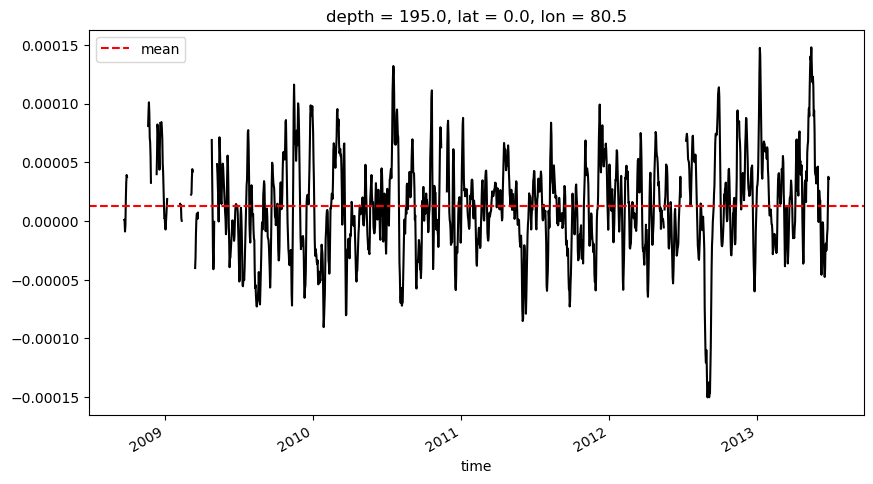

In [25]:
plt.subplots(figsize = (10,5))
w_2_trial = w_2.sel(depth = 195)
w_2_trial = w_2_trial[0:1786]
w_2_trial.plot(color = 'k')
w_2_trial_m = np.mean(w_2_trial)
plt.axhline(y=w_2_trial_m, color = 'r', ls = '--', label = 'mean')
plt.legend()
# Checking to see why time averaged w strays towards the 175 m mark in depth 

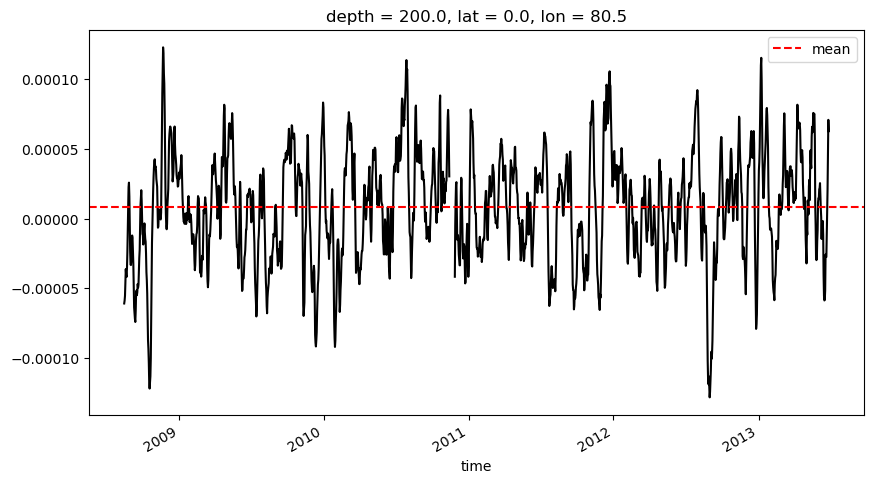

In [26]:
plt.subplots(figsize = (10,5))
w_3_trial = w_3.sel(depth = 200)
# w_3_trial = w_3_trial[0:1786]
w_3_trial.plot(color = 'k')
w_3_trial_m = np.mean(w_3_trial)
plt.axhline(y=w_3_trial_m, color = 'r', ls = '--', label = 'mean')
plt.legend()

In [27]:
# A = w_1.loc[:, 200]
# for i in range(len(A)):
#     print(i)
#     print(A[i])
    
# goes bad at iteration 1812, 2013-07-31T12:00:00

In [28]:
# w_2_1 = w_2.sel(depth = slice('0', '170'))
# w_2_2 = w_2.sel(depth = slice('170', '205'))
# w_2_2 = w_2_2.sel(time = slice('2009-08-01', '2013-07-06'))
# w_2_new = [[w_2_1], [w_2_2]]
# w_2_new = xr.combine_nested(w_2_new, concat_dim = ['depth', None])
# w_2_new

In [29]:
w_2 = w_2.sel(time = slice("2009-01-01", "2013-07-06"))

In [30]:
w_1_m = w_1[0:1786]
w_1_m = w_1_m.groupby('depth').mean('time')

In [31]:
w_2_m = w_2[0:1786]
w_2_m = w_2_m.groupby('depth').mean('time')
# w_2_2_m = w_2_2[0:1786]
# w_2_2_m = w_2_2_m.groupby('depth').mean('time')
w_3_m = w_3.groupby('depth').mean('time')

In [32]:
w_2_m

<xarray.DataArray (depth: 41)>
array([ 0.00000000e+00, -3.87277665e-07, -7.34403715e-07, -1.03097994e-06,
       -1.26646397e-06, -1.43583975e-06, -1.52809831e-06, -1.53499627e-06,
       -1.39839825e-06, -1.10318200e-06, -7.07965189e-07, -2.22798955e-07,
        3.25210211e-07,  9.02475245e-07,  1.49320163e-06,  2.09717963e-06,
        2.73604083e-06,  3.43725916e-06,  4.22633332e-06,  5.09043266e-06,
        5.97809944e-06,  6.81750563e-06,  7.55152523e-06,  8.16457115e-06,
        8.66364987e-06,  9.06006603e-06,  9.36730173e-06,  9.60850430e-06,
        9.81337251e-06,  1.00099359e-05,  1.02134350e-05,  1.04234439e-05,
        1.06323753e-05,  1.08284949e-05,  1.10011876e-05,  1.11481426e-05,
        1.12749418e-05,  1.14102907e-05,  1.14999780e-05,  1.16113823e-05,
        1.16161638e-05])
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 ... 185.0 190.0 195.0 200.0
    lat      float32 0.0
    lon      float32 80.5

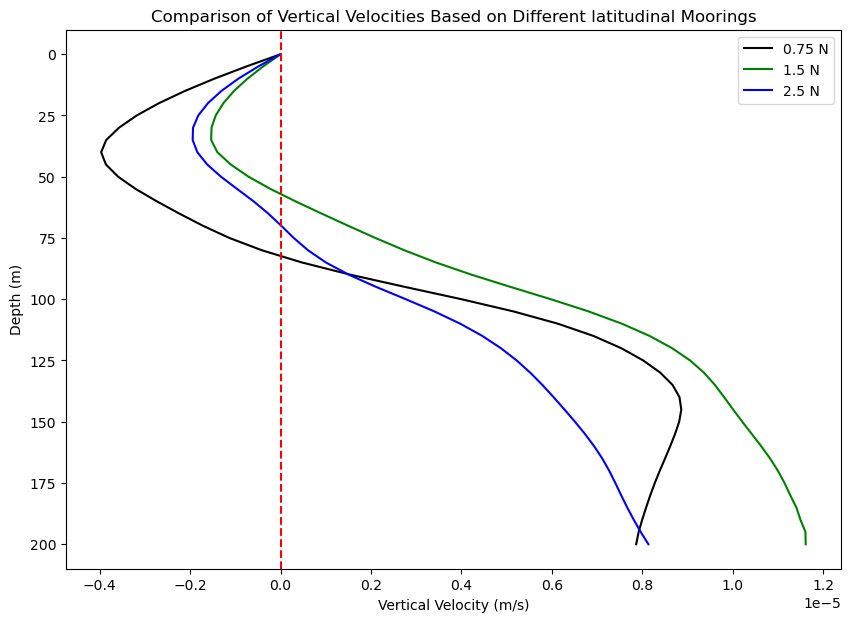

In [33]:
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(w_1_m, w_1_m['depth'], color = 'k', label = '0.75 N')
plt.plot(w_2_m, w_2_m['depth'], color = 'g', label = '1.5 N')
# plt.plot(w_2_2_m, w_2_2_m['depth'], color = 'g', label = '1.5 N')
plt.plot(w_3_m, w_3_m['depth'], color = 'b', label = '2.5 N')
plt.gca().invert_yaxis()
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.legend()
plt.xlabel('Vertical Velocity (m/s)')
plt.ylabel('Depth (m)')
plt.title('Comparison of Vertical Velocities Based on Different latitudinal Moorings')
plt.savefig('Vertical_Velocities_from_different_Latitudinal_Moorings.pdf')

# Could this be because of different dividends of v in each dv value?

In [34]:
ci = 1.96 * np.std(w_1_m)/np.sqrt(len(w_1_m['depth']))

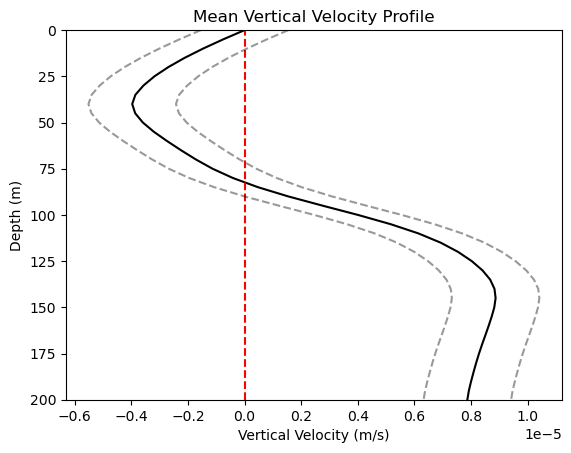

In [35]:
fig, ax = plt.subplots()
plt.plot(w_1_m, w_1_m['depth'], color = 'k')
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.ylim(0, 200)
plt.gca().invert_yaxis()
plt.title('Mean Vertical Velocity Profile')
plt.ylabel('Depth (m)')
#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('Vertical Velocity (m/s)')
#ax.xaxis.set_label_position('top')
plt.plot((w_1_m + ci), w_1_m['depth'], color = 'k', ls = '--', alpha = 0.4)
plt.plot((w_1_m - ci), w_1_m['depth'], color = 'k', ls = '--', alpha = 0.4)
plt.savefig('Mean_Vertical_Velocity_Profile.pdf')

Text(0.5, 0, 'Date')

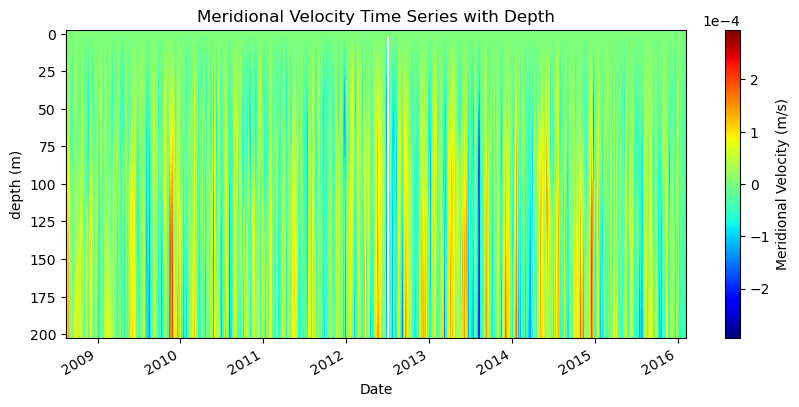

In [36]:
dv_75 = (v_3 - v_5) / 16700000
dv_75_i = dv_75
dv_75 = integrate.cumtrapz(dv_75, dv_75['depth'], initial=0)
dv_75 = xr.DataArray(dv_75, coords=dv_75_i.coords, dims=dv_75_i.dims, attrs=dv_75_i.attrs)
plt.figure(figsize = (10,4))
dv_75.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
#plt.xlim(dv_75['time'][0], dv_75['time'][1812])
plt.title('Meridional Velocity Time Series with Depth')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Meridional Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')

Text(0.5, 0, 'Date')

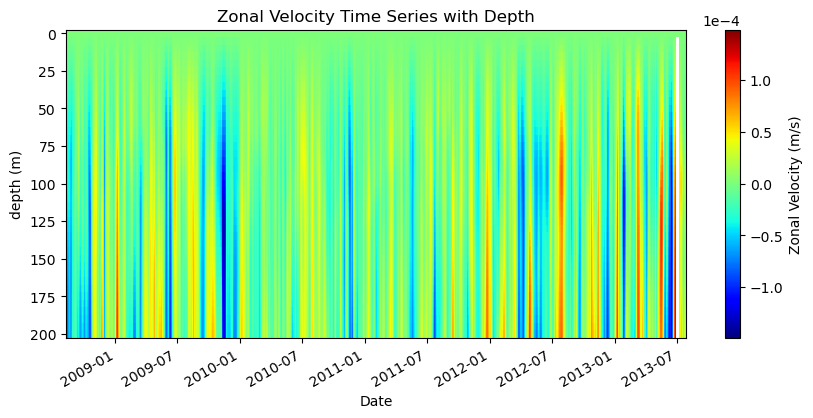

In [37]:
du = (u_4 - u_2) / 55600000
du_i = du
du = integrate.cumtrapz(du, du['depth'], initial=0)
du = xr.DataArray(du, coords=du_i.coords, dims=du_i.dims, attrs=du_i.attrs)
plt.figure(figsize = (10,4))
du.plot(x = 'time', y = 'depth', cmap = 'jet')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.xlim(du['time'][0], du['time'][1812])
plt.title('Zonal Velocity Time Series with Depth')
ax = plt.gca()
cb = ax.collections[-1].colorbar
cb.set_label('Zonal Velocity (m/s)')
cb.formatter.set_powerlimits((0, 0))
cb.update_ticks()
plt.xlabel('Date')


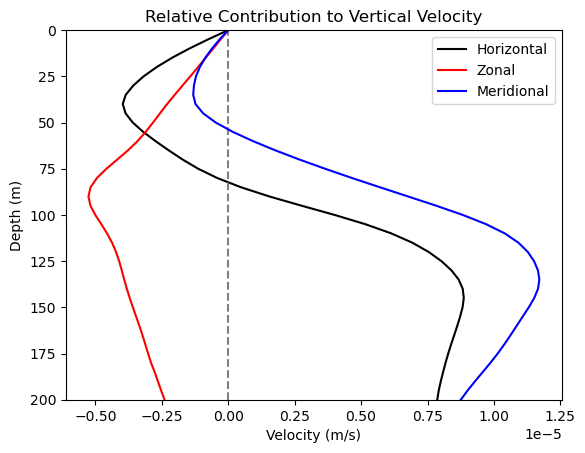

In [38]:
fig, ax = plt.subplots()
plt.plot(w_1_m, w_1_m['depth'], color = 'k', label = 'Horizontal')
plt.axvline(x = 0, color = 'grey', linestyle = '--')
plt.ylim(0, 200)
plt.gca().invert_yaxis()
plt.title('Relative Contribution to Vertical Velocity')
plt.ylabel('Depth (m)')
#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('Velocity (m/s)')
#ax.xaxis.set_label_position('top')
du_m = du.groupby('depth').mean('time')
dv_75_m = dv_75.groupby('depth').mean('time')
plt.plot(du_m, du_m['depth'], color = 'r', label = 'Zonal')
plt.plot(dv_75_m, dv_75_m['depth'], color = 'b', label = 'Meridional')
plt.legend()
plt.savefig('Relative_Contributions.pdf')

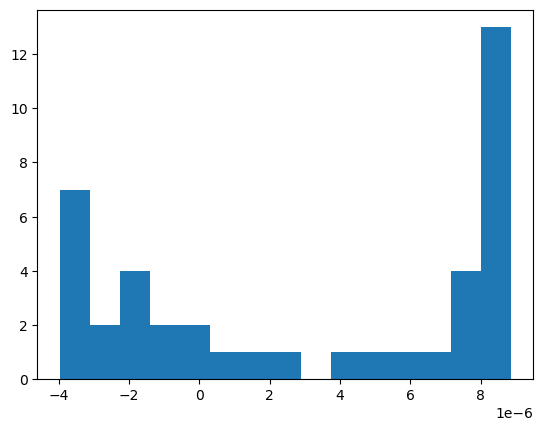

In [39]:
plt.hist(w_1_m, bins = 15)
plt.show()

In [40]:
%store -r dataset
tauxd = dataset
tau_x = tauxd['taux']

In [41]:
tau_x.to_netcdf('~/NOAA Work/tau_x.nc'); # save to a netcdf file

In [42]:
tau_x01 = tau_x.isel(longitude = 50, latitude = 30)
tau_x01 = tau_x01.sel(time = slice("2009-01-01", "2013-07-30"))
tau_x02 = tau_x.isel(longitude = 50, latitude = 29) 
tau_x02 = tau_x02.sel(time = slice("2009-01-01", "2013-07-30"))
tau_x0 = np.mean( np.array([ tau_x01, tau_x02 ]), axis=0 ) # This is averaged between .5 N and .5 S; repeat for 1.5N and 1.5 S and 2.5N and 2.5S
tau_x0 = xr.DataArray(tau_x0, coords=tau_x01.coords, dims=tau_x01.dims, attrs=tau_x01.attrs)
tau_x0 = pd.DataFrame(tau_x0)
tau_x0_m = tau_x0.rolling(15).mean().fillna(method='bfill').fillna(method='ffill')
# tau_x0_m = tau_x0.rolling(time = 15, center = True).mean()
# tau_x0 = tau_x0.replace([np.inf, -np.inf], np.nan).dropna()
tau_x0_m = tau_x0_m.iloc[:, 0]
tau_x0

,0
0,0.002103
1,0.000060
2,-0.003159
3,-0.005437
4,-0.007661
...,...
1667,-0.010004
1668,-0.044588
1669,-0.017833
1670,-0.002834


In [43]:
w_1_0 = w_1.sortby("time")
w_1_0 = w_1_0.sel(time=slice("2009-01-01", "2013-07-30"))
w_1_0 = pd.DataFrame(w_1_0)
w_1_0_m = w_1_0.rolling(15).mean().fillna(method='bfill').fillna(method='ffill')
# w_1_0_m = w_1_0.rolling(time = 15, center = False).mean()
w_1_0_m

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,4.371977e-06,8.284675e-06,1.161895e-05,1.425566e-05,1.605383e-05,1.684601e-05,1.656774e-05,1.528582e-05,0.000013,...,0.000001,0.000002,0.000002,0.000003,0.000005,0.000006,0.000007,0.000008,0.000009,0.000009
1,0.0,4.371977e-06,8.284675e-06,1.161895e-05,1.425566e-05,1.605383e-05,1.684601e-05,1.656774e-05,1.528582e-05,0.000013,...,0.000001,0.000002,0.000002,0.000003,0.000005,0.000006,0.000007,0.000008,0.000009,0.000009
2,0.0,4.371977e-06,8.284675e-06,1.161895e-05,1.425566e-05,1.605383e-05,1.684601e-05,1.656774e-05,1.528582e-05,0.000013,...,0.000001,0.000002,0.000002,0.000003,0.000005,0.000006,0.000007,0.000008,0.000009,0.000009
3,0.0,4.371977e-06,8.284675e-06,1.161895e-05,1.425566e-05,1.605383e-05,1.684601e-05,1.656774e-05,1.528582e-05,0.000013,...,0.000001,0.000002,0.000002,0.000003,0.000005,0.000006,0.000007,0.000008,0.000009,0.000009
4,0.0,4.371977e-06,8.284675e-06,1.161895e-05,1.425566e-05,1.605383e-05,1.684601e-05,1.656774e-05,1.528582e-05,0.000013,...,0.000001,0.000002,0.000002,0.000003,0.000005,0.000006,0.000007,0.000008,0.000009,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0.0,-1.543390e-06,-3.086780e-06,-4.630170e-06,-6.173560e-06,-7.716950e-06,-9.260340e-06,-1.107960e-05,-1.311116e-05,-0.000015,...,-0.000017,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000017,-0.000017,-0.000018,-0.000020
1668,0.0,-1.074030e-06,-2.148060e-06,-3.222090e-06,-4.296120e-06,-5.370150e-06,-6.444180e-06,-7.773170e-06,-9.339674e-06,-0.000011,...,-0.000014,-0.000015,-0.000015,-0.000015,-0.000015,-0.000014,-0.000014,-0.000014,-0.000015,-0.000017
1669,0.0,-7.821396e-07,-1.564279e-06,-2.346419e-06,-3.128558e-06,-3.910698e-06,-4.692837e-06,-5.699958e-06,-6.946270e-06,-0.000008,...,-0.000015,-0.000016,-0.000016,-0.000016,-0.000016,-0.000015,-0.000015,-0.000015,-0.000016,-0.000017
1670,0.0,-5.311188e-07,-1.062238e-06,-1.593356e-06,-2.124475e-06,-2.655594e-06,-3.186713e-06,-3.939963e-06,-4.930674e-06,-0.000006,...,-0.000017,-0.000017,-0.000017,-0.000017,-0.000017,-0.000016,-0.000016,-0.000015,-0.000016,-0.000017


In [44]:
v = w_1.sortby('time')
v[:, 1]
# v = v.sel(time = slice('2009-01-01', '2013-07-30'))
# v_m = np.empty([41, 1672])
# for i in range(41):
#     v = v[:, i]
#     v_m[i] = v.rolling(time = 15, center = True).mean()

<xarray.DataArray (time: 2196)>
array([-4.76555109e-07, -5.51777029e-07,  1.15897699e-06, ...,
                   nan,             nan,             nan])
Coordinates:
  * time     (time) datetime64[ns] 2008-08-14T12:00:00 ... 2014-08-18T12:00:00
    depth    float32 5.0
    lat      float32 0.0
    lon      float32 80.5

In [45]:
w_1_0.isnull()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1668,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1669,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
w_trial = w_1_0_m.iloc[:, 1]
# w_trial = pd.DataFrame(w_trial)
# w_trial = w_trial.replace([np.inf, -np.inf], np.nan).dropna()
w_trial

0       4.371977e-06
1       4.371977e-06
2       4.371977e-06
3       4.371977e-06
4       4.371977e-06
            ...     
1667   -1.543390e-06
1668   -1.074030e-06
1669   -7.821396e-07
1670   -5.311188e-07
1671    3.326732e-10
Name: 1, Length: 1672, dtype: float64

In [47]:
tau_x0

,0
0,0.002103
1,0.000060
2,-0.003159
3,-0.005437
4,-0.007661
...,...
1667,-0.010004
1668,-0.044588
1669,-0.017833
1670,-0.002834


In [48]:
x_m = tau_x0_m.mean(axis = 0)
y_m = w_trial.mean()
x_m
# This is a tiny bit different than that of wind work's mean of 0.5N 80.5 E because I averaged this taux from .5N to .5S

0.030466173583022536

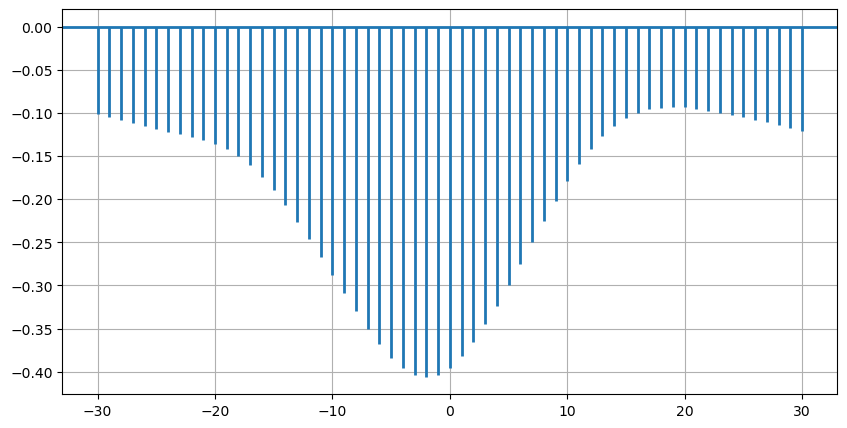

In [49]:
x = tau_x0_m - x_m
y = w_trial - y_m
fig, ax = plt.subplots(figsize = (10,5))
ax.xcorr(x, y, normed = True, usevlines = True, maxlags = 30, lw =2)
ax.grid(True)
# This is a snapshot of cross-correlation between taux and vertical velocity at depth specified in w_trial

C:\Users\Ayden van den Berg\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2083: RuntimeWarning: invalid value encountered in divide
  correls /= np.sqrt(np.dot(x, x) * np.dot(y, y))
C:\Users\Ayden van den Berg\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


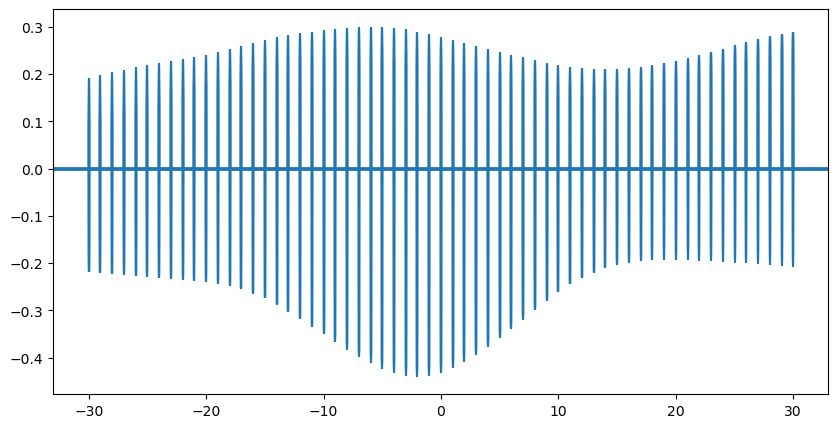

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
for i in range(41):
    w_t = w_1_0_m.iloc[:, i]
    ax.xcorr(tau_x0_m, w_t, maxlags = 30)

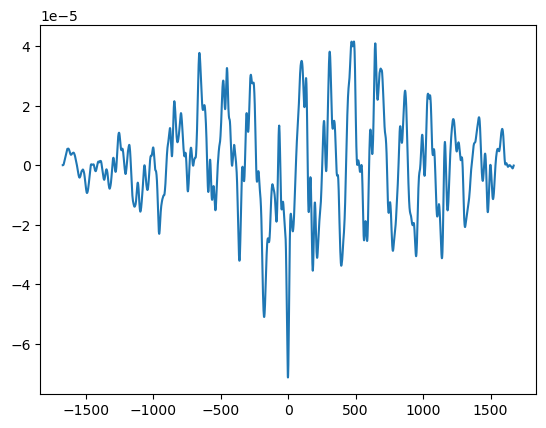

In [51]:
correl = signal.correlate(x, y, mode="full", method = 'auto')
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correl)]
correl
plt.plot(lags, correl)

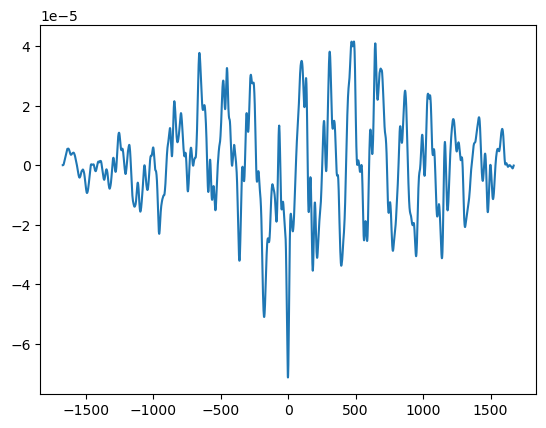

In [52]:
correlation = np.correlate(x, y, mode = 'Full')
lag = (np.argmax(correlation) - correlation.size) / 2
correlation
plt.plot(lags, correlation)



In [53]:
# def xcorr(x, y, maxlags=30):
#     Nx = len(x)
#     if Nx != len(y):
#         raise ValueError('x and y must be equal length')

#     c = np.correlate(x, y, mode=2)

#     if maxlags is None:
#         maxlags = Nx - 1

#     if maxlags >= Nx or maxlags < 1:
#         raise ValueError('maxlags must be None or strictly positive < %d' % Nx)

#     c = c[Nx - 1 - maxlags:Nx + maxlags]

#     return c

In [54]:
# def xcorr(x,y):
#     """
#     Perform Cross-Correlation on x and y
#     x    : 1st signal
#     y    : 2nd signal

#     returns
#     lags : lags of correlation
#     corr : coefficients of correlation
#     """
#     corr = signal.correlate(x, y, mode="full")
#     lags = signal.correlation_lags(len(x), len(y), mode="full")
#     return lags, corr

# x = tau_x0_m - tau_x0_m.mean();
# y = w_trial - w_trial.mean();
# lags,c = xcorr(x,y);
# plt.figure()
# plt.plot(lags,c)
# plt.xlim(-30, 30)
# plt.show()

In [55]:
c = np.empty([41, 1672])
for i in range(41):
    w_trial = w_1_0_m.iloc[:, i]
    x = tau_x0_m - tau_x0_m.mean()
    y = w_trial - w_trial.mean()
    c[i] = np.correlate(x, y, mode = 'Valid')
c

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.94731622e-05, -6.94731622e-05, -6.94731622e-05, ...,
        -6.94731622e-05, -6.94731622e-05, -6.94731622e-05],
       [-1.38619439e-04, -1.38619439e-04, -1.38619439e-04, ...,
        -1.38619439e-04, -1.38619439e-04, -1.38619439e-04],
       ...,
       [ 1.57869754e-04,  1.57869754e-04,  1.57869754e-04, ...,
         1.57869754e-04,  1.57869754e-04,  1.57869754e-04],
       [ 1.45680953e-04,  1.45680953e-04,  1.45680953e-04, ...,
         1.45680953e-04,  1.45680953e-04,  1.45680953e-04],
       [ 1.33802038e-04,  1.33802038e-04,  1.33802038e-04, ...,
         1.33802038e-04,  1.33802038e-04,  1.33802038e-04]])

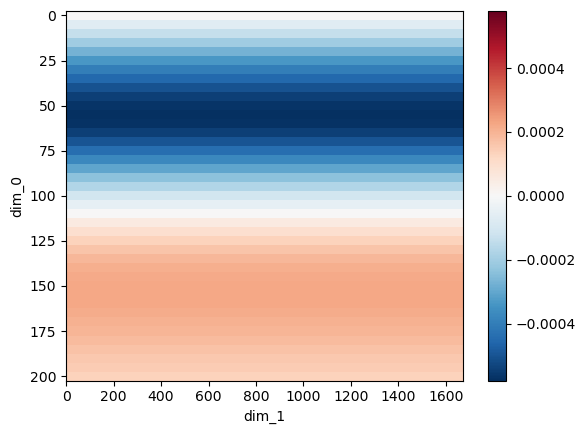

In [56]:
c = xr.DataArray(c)
depth = np.arange(0, 205, 5)
c['dim_0']= depth
c.plot(x = 'dim_1', y = 'dim_0')
plt.gca().invert_yaxis()

In [57]:
# depth = np.arange(0, 205, 5)
# col = np.arange(0, 1673, 1)
# c = pd.DataFrame(data = c, index = depth, columns = col)
# c.plot(x = 'columns', y = 'depth')

In [58]:
# import statsmodels.api as sm
# corr = sm.tsa.stattools.ccf(tau_x0_m, w_trial, adjusted = True, fft = True)
# corr

In [59]:
# b = np.empty([41, 1672])
# b.shape

In [60]:
# cor = np.empty([41, 1672])
# for i in range(41):
#     w_trial = w_1_0_m.iloc[:, i]
#     cor[i] = sm.tsa.stattools.ccf(tau_x0_m, w_trial, adjusted = True)
# cor = pd.DataFrame(cor)

In [61]:
# depth = np.arange(0, 205, 5)
# cor['depth'] = depth
# cor

In [62]:
# cor.plot()

# plt.gca().invert_yaxis()


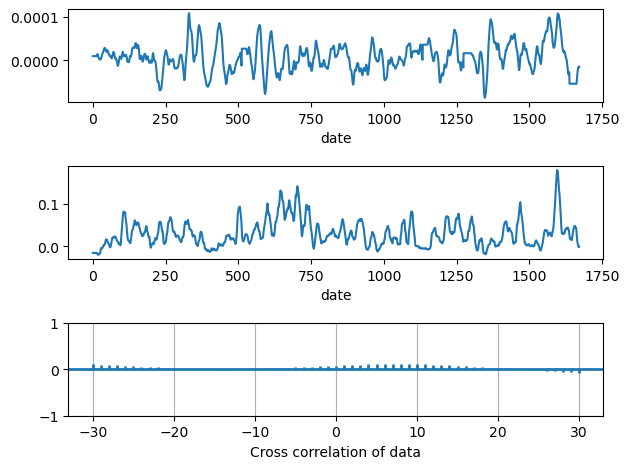

In [63]:

# corr, _ = stats.spearmanr(w_1, tau_x0)
total = sum(w_trial)
av = total / len(w_trial)
z = [i - av for i in w_trial]

total1 = sum(tau_x0_m)
av1 = total1 / len(tau_x0_m)
z1 = [i - av1 for i in tau_x0_m]

fig = plt.figure()

# Search trend volume
ax1 = fig.add_subplot(311)
w_trial.plot(x = 'time', ax = ax1)
ax1.set_xlabel('date')

# Random: "search trend volume"
ax2 = fig.add_subplot(312)
ax2.plot(tau_x0_m)
ax2.set_xlabel('date')

# Is there a pattern in search trend for this keyword?
ax3 = fig.add_subplot(313)
ax3.set_xlabel('Cross correlation of data')
ax3.xcorr(z, z1, usevlines=True, maxlags=30, normed=True, lw=2)
# corr = signal.correlate2d(w_trial, tau_x0, boundary='fill', mode='same')
# ax3.plot(corr)
ax3.grid(True)
plt.ylim(-1, 1)

plt.tight_layout()

plt.show()

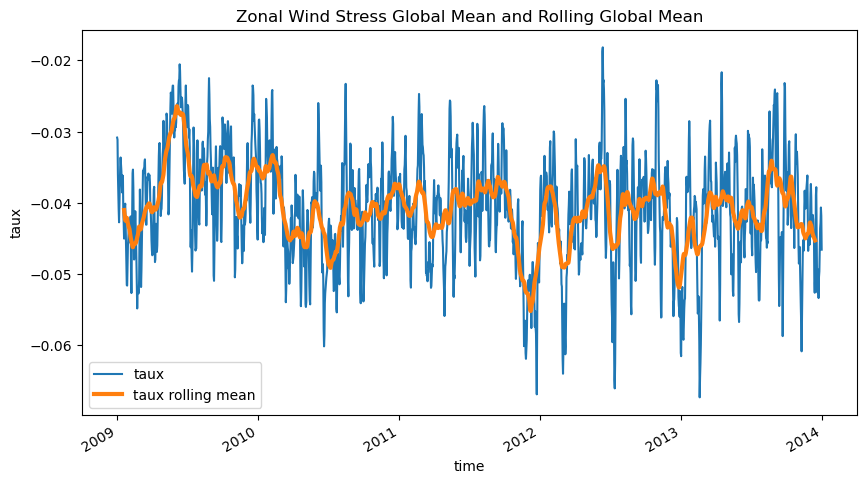

In [64]:
weights = np.cos(np.deg2rad(tauxd.latitude)); weights.name = 'weights'
taux_m = tau_x.weighted(weights).mean(dim = ['latitude', 'longitude'])

taux_m_r = taux_m.rolling(time = 36, center = True).mean()

plt.figure(figsize=(10,5))
taux_m.plot(label = 'taux')
taux_m_r.plot(label = 'taux rolling mean', lw = 3)
plt.title('Zonal Wind Stress Global Mean and Rolling Global Mean')
plt.legend()
# This shows global trend of mean easterly winds

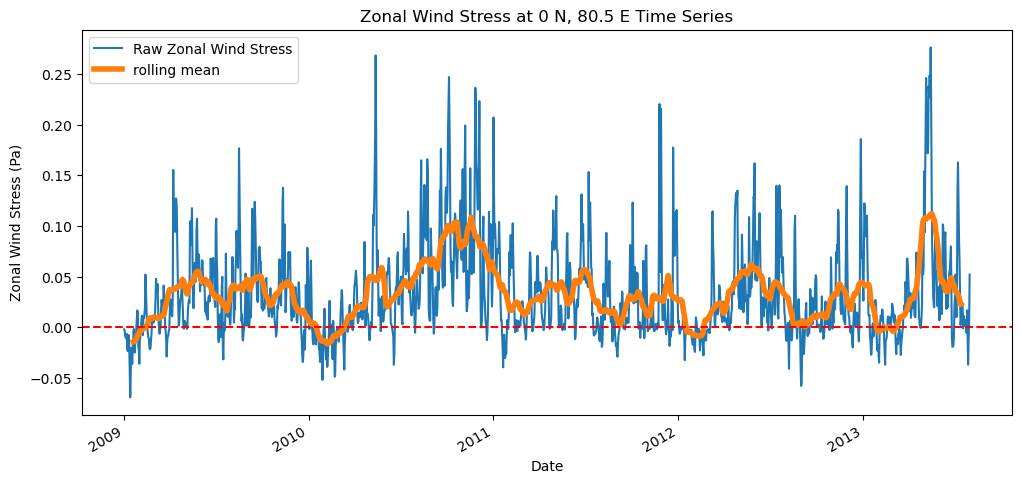

In [65]:
taux = tau_x.isel(longitude = 50, latitude = 30)
taux = taux.sel(time = slice("2009-01-01", "2013-07-30"))
tau_x0_m_r = taux.rolling(time = 36, center = True).mean() # smoothed over 36 days
plt.figure(figsize=(12, 5)) 
plt.plot(taux['time'], taux, label = 'Raw Zonal Wind Stress')
tau_x0_m_r.plot(label = 'rolling mean', lw = 4)
plt.axhline(y=0, color = 'r', ls = '--')
plt.xlabel('Date')
plt.ylabel('Zonal Wind Stress (Pa)')
plt.title('Zonal Wind Stress at 0 N, 80.5 E Time Series')
plt.legend()
# This shows difference from global trends above (mean westerly)

In [66]:
tau_x0_m_r

<xarray.DataArray 'taux' (time: 1672)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    longitude  float32 80.5
    latitude   float32 0.5
  * time       (time) datetime64[ns] 2009-01-01T11:59:59.999959808 ... 2013-0...

In [67]:
taux_clim = tauxd.groupby('time.month').mean('time')

In [68]:
tuax_a = tauxd.groupby("time.month")-taux_clim 